# PRCP-1018-Bike Rental

# PROJECT TEAM ID: PTID-CDS-MAY-23-1518

### Problem Statement
Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.


### Dataset Information:
This dataset contains the  daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.Bike sharing systems are a new version of traditional bike rentals where the whole process from membership, rental and return back has been automated. Through these systems, users are easily able to rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.


#### Buisness case:To predict daily bike rental count based on the environmental and seasonal settings

##### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

##### Loading  the data

In [5]:
data1=pd.read_csv('day.csv')

###### Basic Checks

In [6]:
data1.head()   #first 5 data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
data1.tail() #last 5 data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


### Domain Analysis

***Although bike sharing is a relatively new form of transport in urban areas, it has become increasingly popular in towns and cities around the world in recent years. Bike sharing is an oriented production service system (PSS) where
ownership of the bike is retained by the provider, who sells the functions of the bike,via modified distribution and payment systems. This popularity can be mainly explained by the fact that bikesharing programmes are associated with various social, environmental,seasonal and economic benefits, such as a decrease in carbon dioxide (CO2) emissions, a reduction in various diseases (e.g., diabetes and obesity), and a decline in traffic congestion and noise
pollution through the provision of alternatives to auto-commuting and an increase in public transit useinstant.*** 

                      

***Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.***

***The features used in this data are:***

***dteday : date***

***season : 
    1:spring
    2:summer
    3:fall
    4:winter***
    
***yr : year (0: 2011, 1:2012)***

***mnth : month ( 1 to 12)***

***holiday : weather day is holiday or not***

***weekday : day of the week***

***workingday : if day is neither weekend nor holiday is 1, otherwise is 0.***

***weathersit : 
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +          Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog***
    
***temp : Normalized temperature in Celsius. The values are divided to 41 (max)***

***atemp: Normalized feeling temperature in Celsius. The values are divided to 50        (max)***

***hum: Normalized humidity. The values are divided to 100 (max)***

***windspeed: Normalized wind speed. The values are divided to 67 (max)***

***casual: count of casual users***

***registered: count of registered users***

***cnt: count of total rental bikes including both casual and registered***


In [8]:
data1.shape   #shape of dataset

(731, 16)

***observation:
    The dataset contains 731 observations and 16 attributes***

In [9]:
data1.dtypes   #Data types

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
data1.describe(include=['O'])

,dteday
count,731
unique,731
top,2011-01-01
freq,1


***observation:dteday is object type data all other are numerical***

In [11]:
data1.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


***observation:
     There are no null values and every features are in numerical that is no categorical datas present***

In [14]:
data1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


***observation:***

***1)731 observations are present in this dataset***

***2)min number of casual bike rental is 2 and max val is 3410***

***3)min number of registered bike rental is 20 and max val is 6946***

***4)Distribution of registered bike rental is higher than casual bike rental***



In [15]:
data1['cnt'].value_counts()

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5046    1
4713    1
4763    1
4785    1
2729    1
Name: cnt, Length: 696, dtype: int64

In [16]:
data1['cnt'].unique()

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425, 1536,
       2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455, 2895, 3348,
       2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944, 4189, 1683,
       4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351, 4401, 4451,
       2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864, 4105, 3409,
       4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274, 4492, 4978,
       4677, 4679, 4758, 4788, 4098, 3982, 3974, 49


***observation:
Target variable is not limited***

## Exploratory Data Analysis(EDA)

### Univariate Analysis

In [17]:
#Automated library for visualization

!pip install sweetviz     

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import sweetviz as sv            # library for univariant analysis
my_report = sv.analyze(data1)     # pass the original dataframe
my_report.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
#OR
data1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

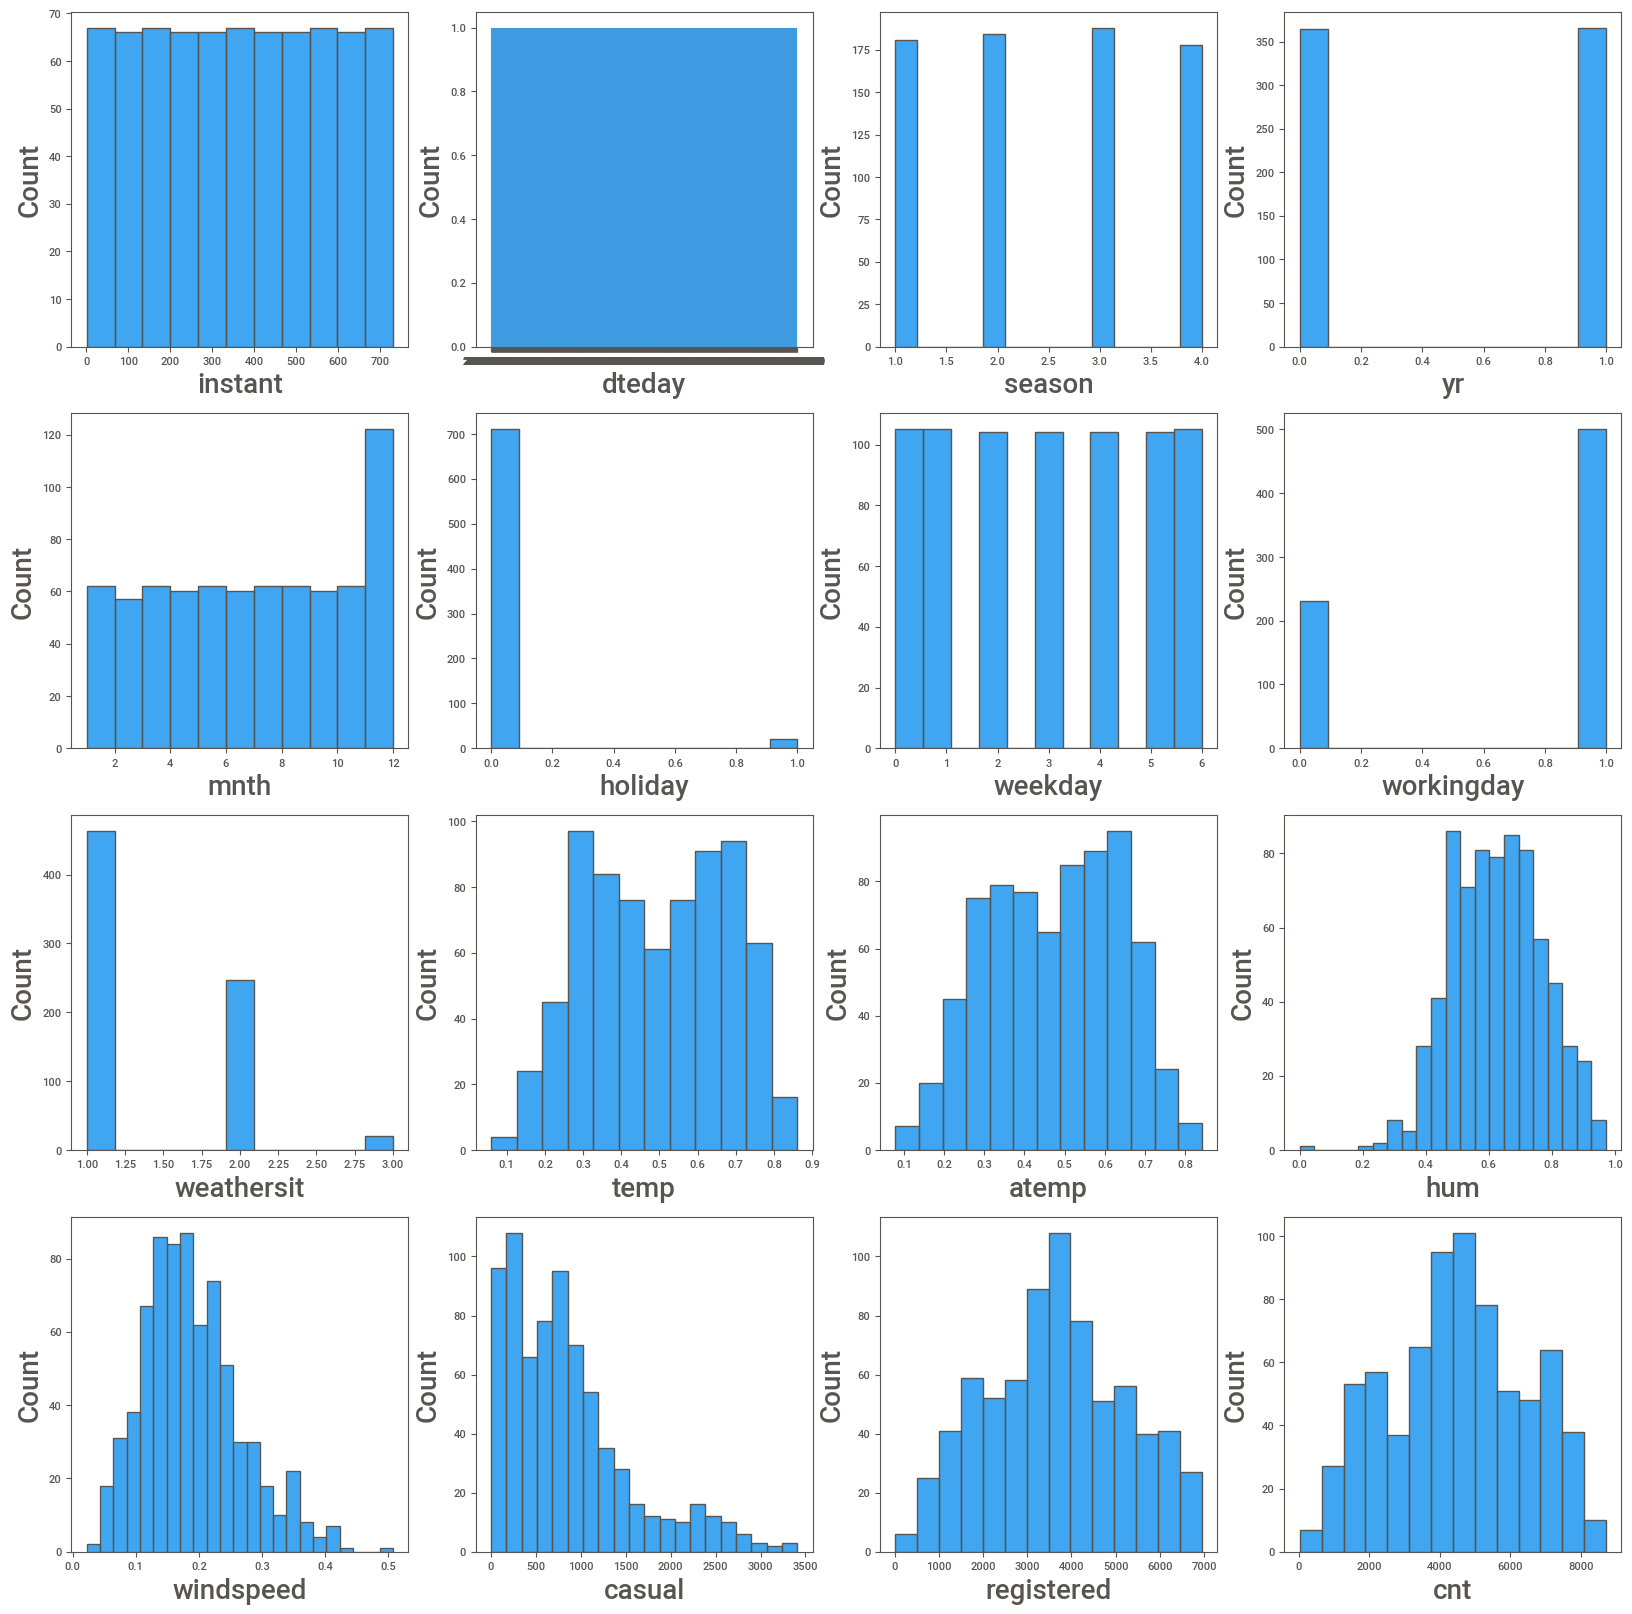

In [20]:
plt.figure(figsize=(20,20))
plotnumber=1    #counter variable
for column in data1:
    ax=plt.subplot(4,4,plotnumber)
    sns.histplot(data1[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout    

***observation:***

***1)There are no much change of frequencies of season, year and weekday***

***2)The last month have high count compared with all other months***

***3)The count is high on no holiday than on holidays***

***4)The count is high during workingdays compared to non working days***

***5)During clear,partly cloudy weather(1) count is highest And during mist cloudy weather(2) the count gets second highest And followed by third highest during snow,light rain weather(3)***

***6)The count gets increased as the temp gets warmer and goes back to the lowest at highest temp.Also atemp is similar to temp***

***7)The count is lowest at low humidity and gets increased as the humidity increase***

***8)When there is too much wind bike rental is too low***

***9)registered bike rental is higher than casual bike rental***

## Bivariate Analysis

### Temperature wise distribution of counts

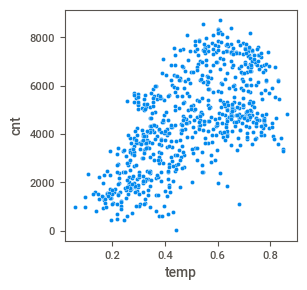

In [21]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='temp',y='cnt',data=data1)
plt.show()

***observation: There is a linear relation between bike rental count and temperature,as warmer the temp is the more bike gets rented***

### atemp wise distribution of counts

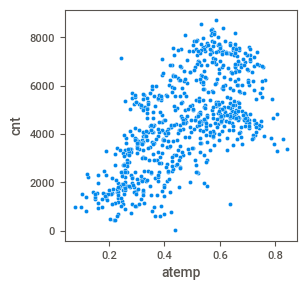

In [22]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='atemp',y='cnt',data=data1)
plt.show()

***observation:temp and atemp have similar distribution and may present redundancy and even multicollinearity hence we can drop out atemp***

### Humidity wise distribution of counts

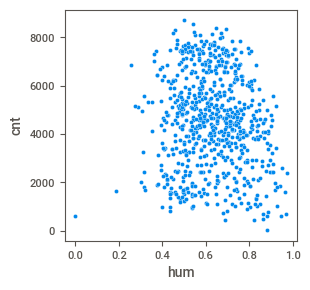

In [23]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='hum',y='cnt',data=data1)
plt.show()

***observation:The bike rental is lowest at low humidity and gets increased as the humidity increase***

### Windspeed wise distribution of counts

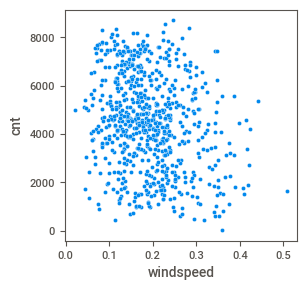

In [24]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='windspeed',y='cnt',data=data1)
plt.show()

***observation:When there is too much wind bike rental is too low***

### Yearly wise distribution of counts

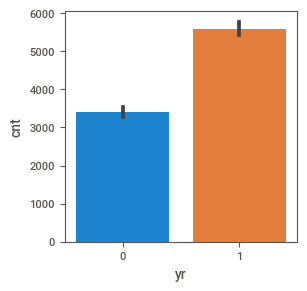

In [25]:
plt.figure(figsize=(3,3))
sns.barplot(x='yr',y='cnt',data=data1)
plt.show()

***observation:
    The bike rental count is highest in the year 2012(1) than in year 2011*** 

### Weather_condition wise distribution of counts

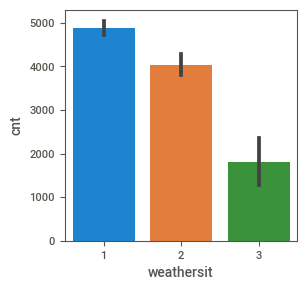

In [26]:
plt.figure(figsize=(3,3))
sns.barplot(x='weathersit',y='cnt',data=data1)
plt.show()

***observation:
    During clear,partly cloudy weather(1) bike rental count is highest 
    And during mist cloudy weather(2) the total count gets second highest
    And followed by third highest during snow,light rain weather(3)***

### Seasonwise monthly distribution of count

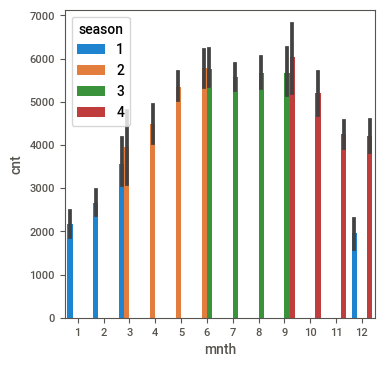

In [27]:
plt.figure(figsize=(4,4))
sns.barplot(x='mnth',y='cnt',data=data1,hue='season')
plt.show()

***observtion:
    During spring and summer season the bike rental count increases through the months
    Whereas during fall and winter seasons the bike rental count decreases through the season***

### Weekday wise monthly distribution of counts

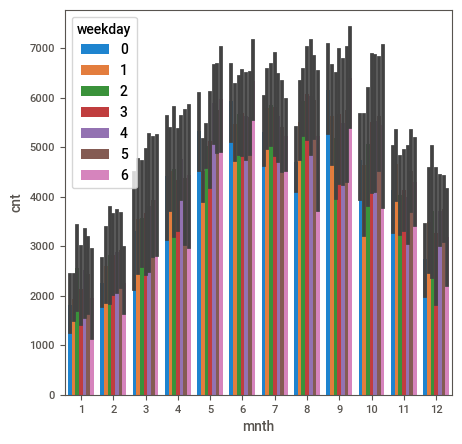

In [28]:
plt.figure(figsize=(5,5))
sns.barplot(x='mnth',y='cnt',data=data1,hue='weekday')
plt.show()

### Holiday wise distribution of counts

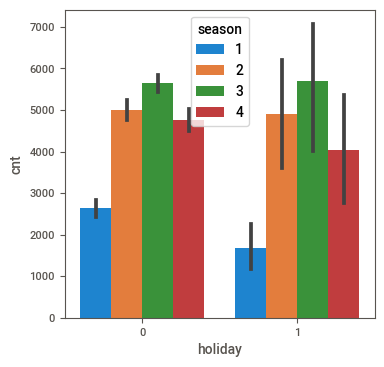

In [29]:
plt.figure(figsize=(4,4))
sns.barplot(x='holiday',y='cnt',data=data1,hue='season')
plt.show()

***Observation:
     During no holiday(0) the bike rental counts is highest compared to during holiday(1) for different seasons*** 

### Workingday wise distribution of counts

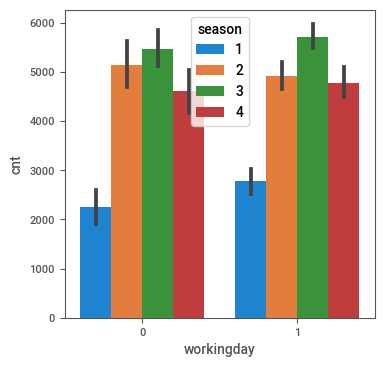

In [30]:
plt.figure(figsize=(4,4))
sns.barplot(x='workingday',y='cnt',data=data1,hue='season')
plt.show()

***observation:
      During workingday(1) the bike rental count is quite highest compared to no workingday(0) for different season***

## Data Preprocessing and Feature engineering

In [31]:
data=data1.drop(['instant','dteday','casual','registered'],axis=1)

In [32]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


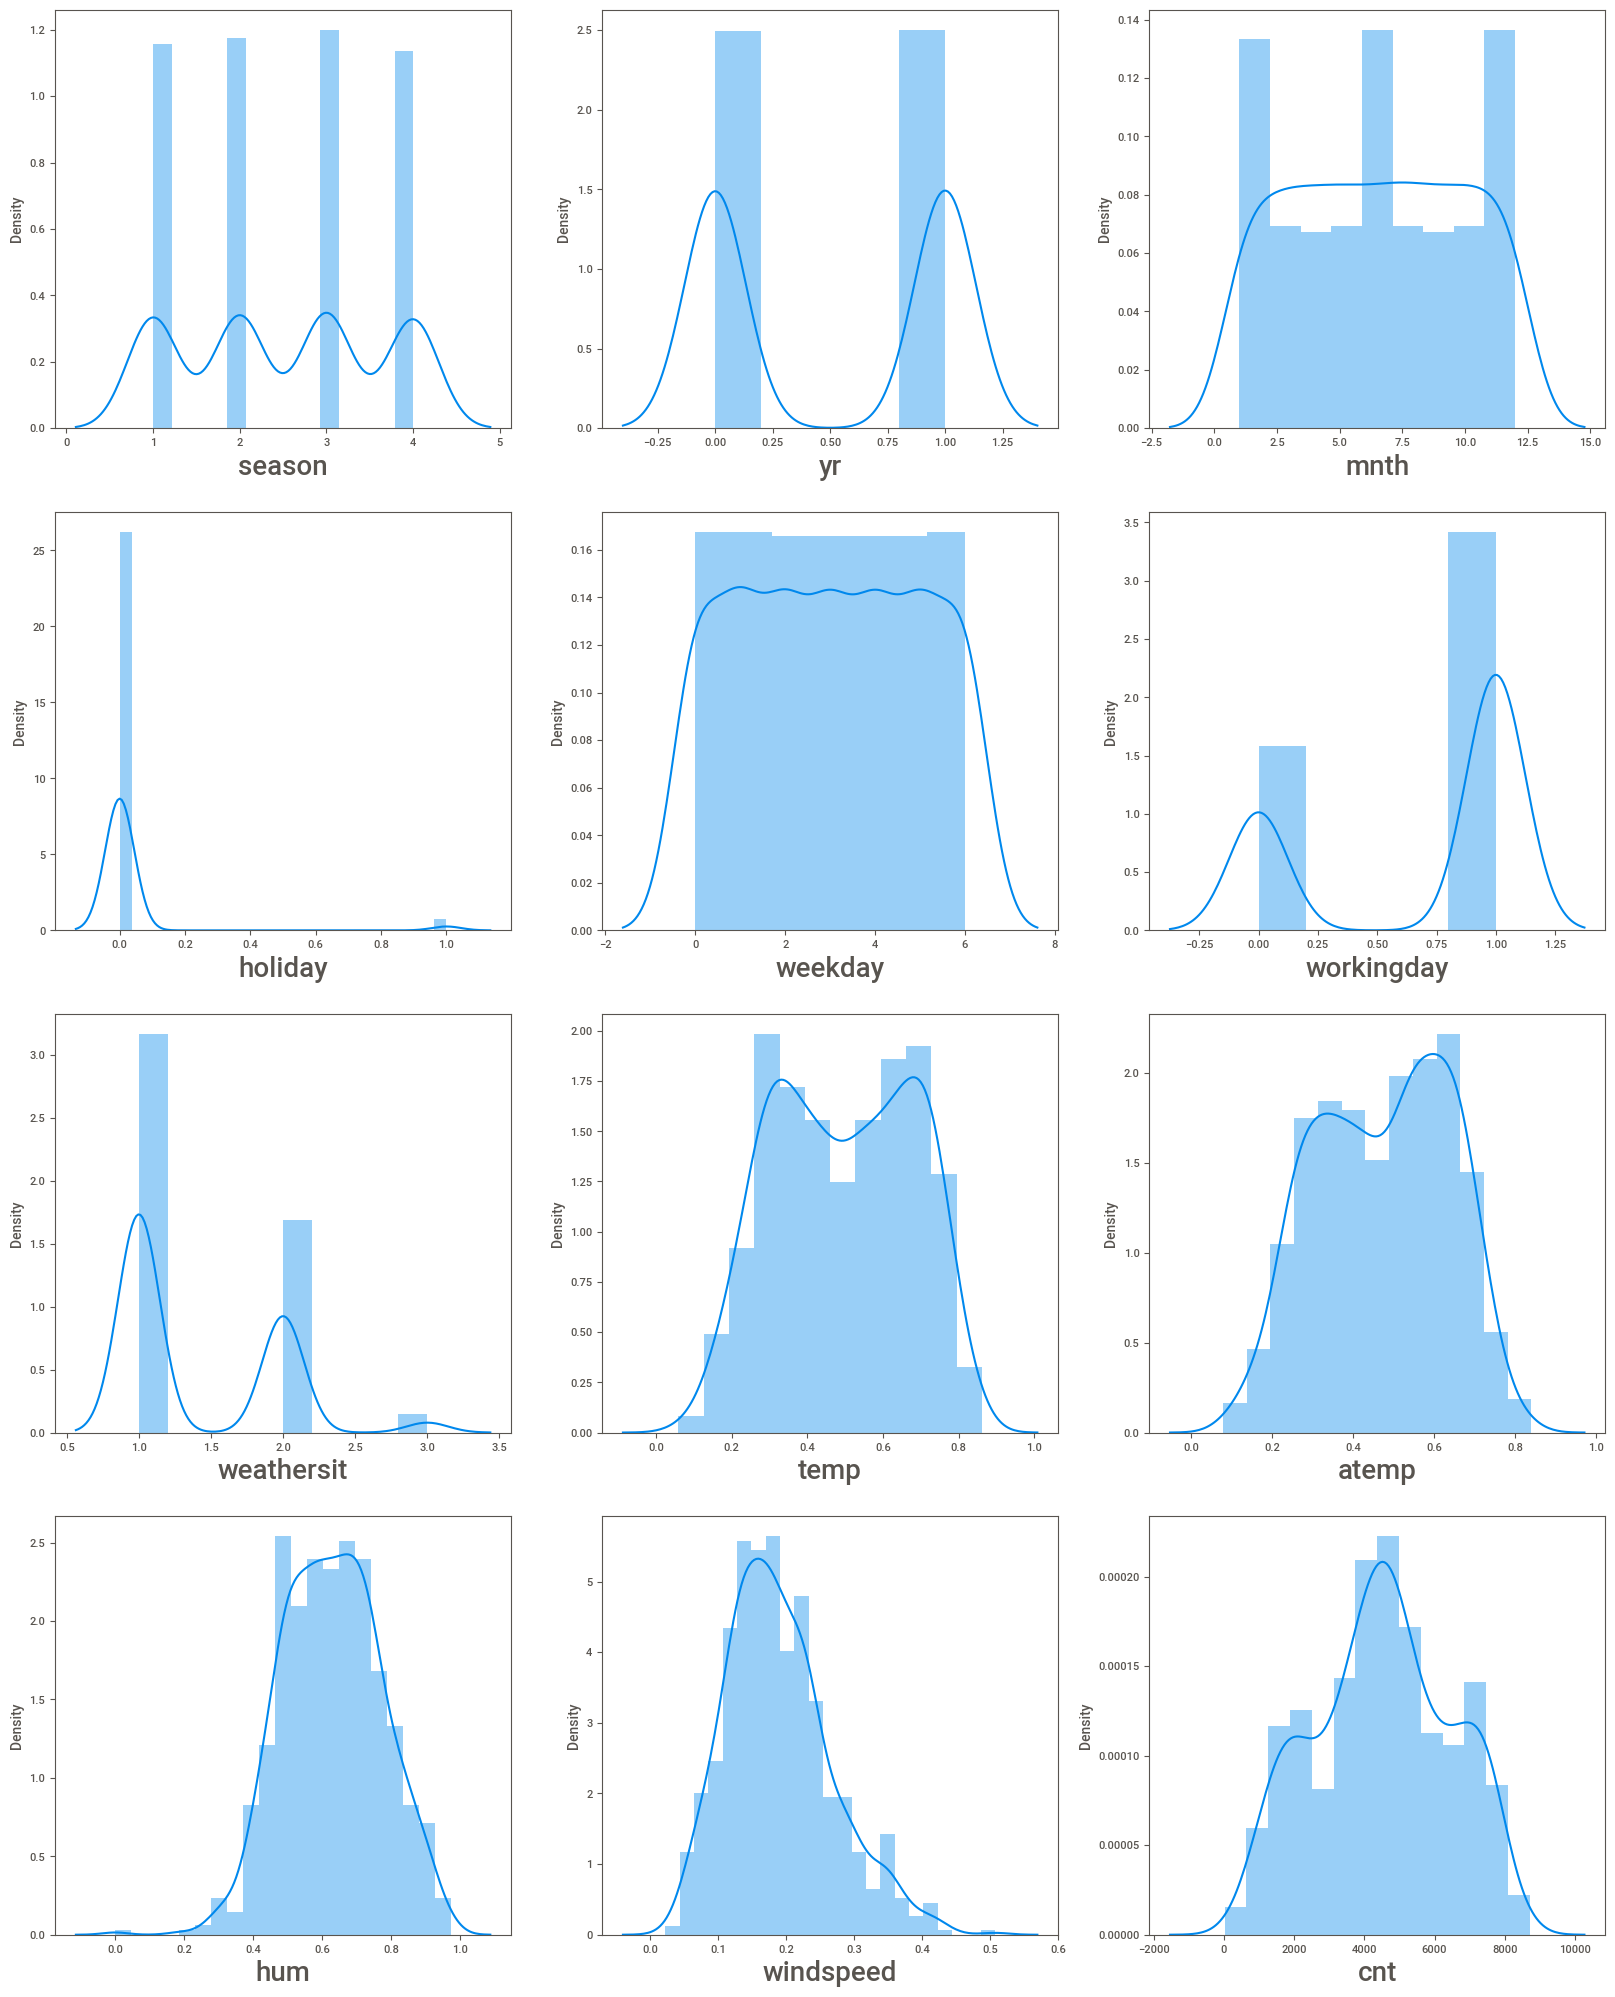

In [33]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1 #maintian count for graph

for column in data:
    if plotnumber<=12 :# as there are 12 columns in the data
        ax = plt.subplot(4,3,plotnumber)# plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

***observation:Since there is skewness in the features 'hum' and 'windspeed' we will go with median while solving outliers***

###### Outlier Analysis

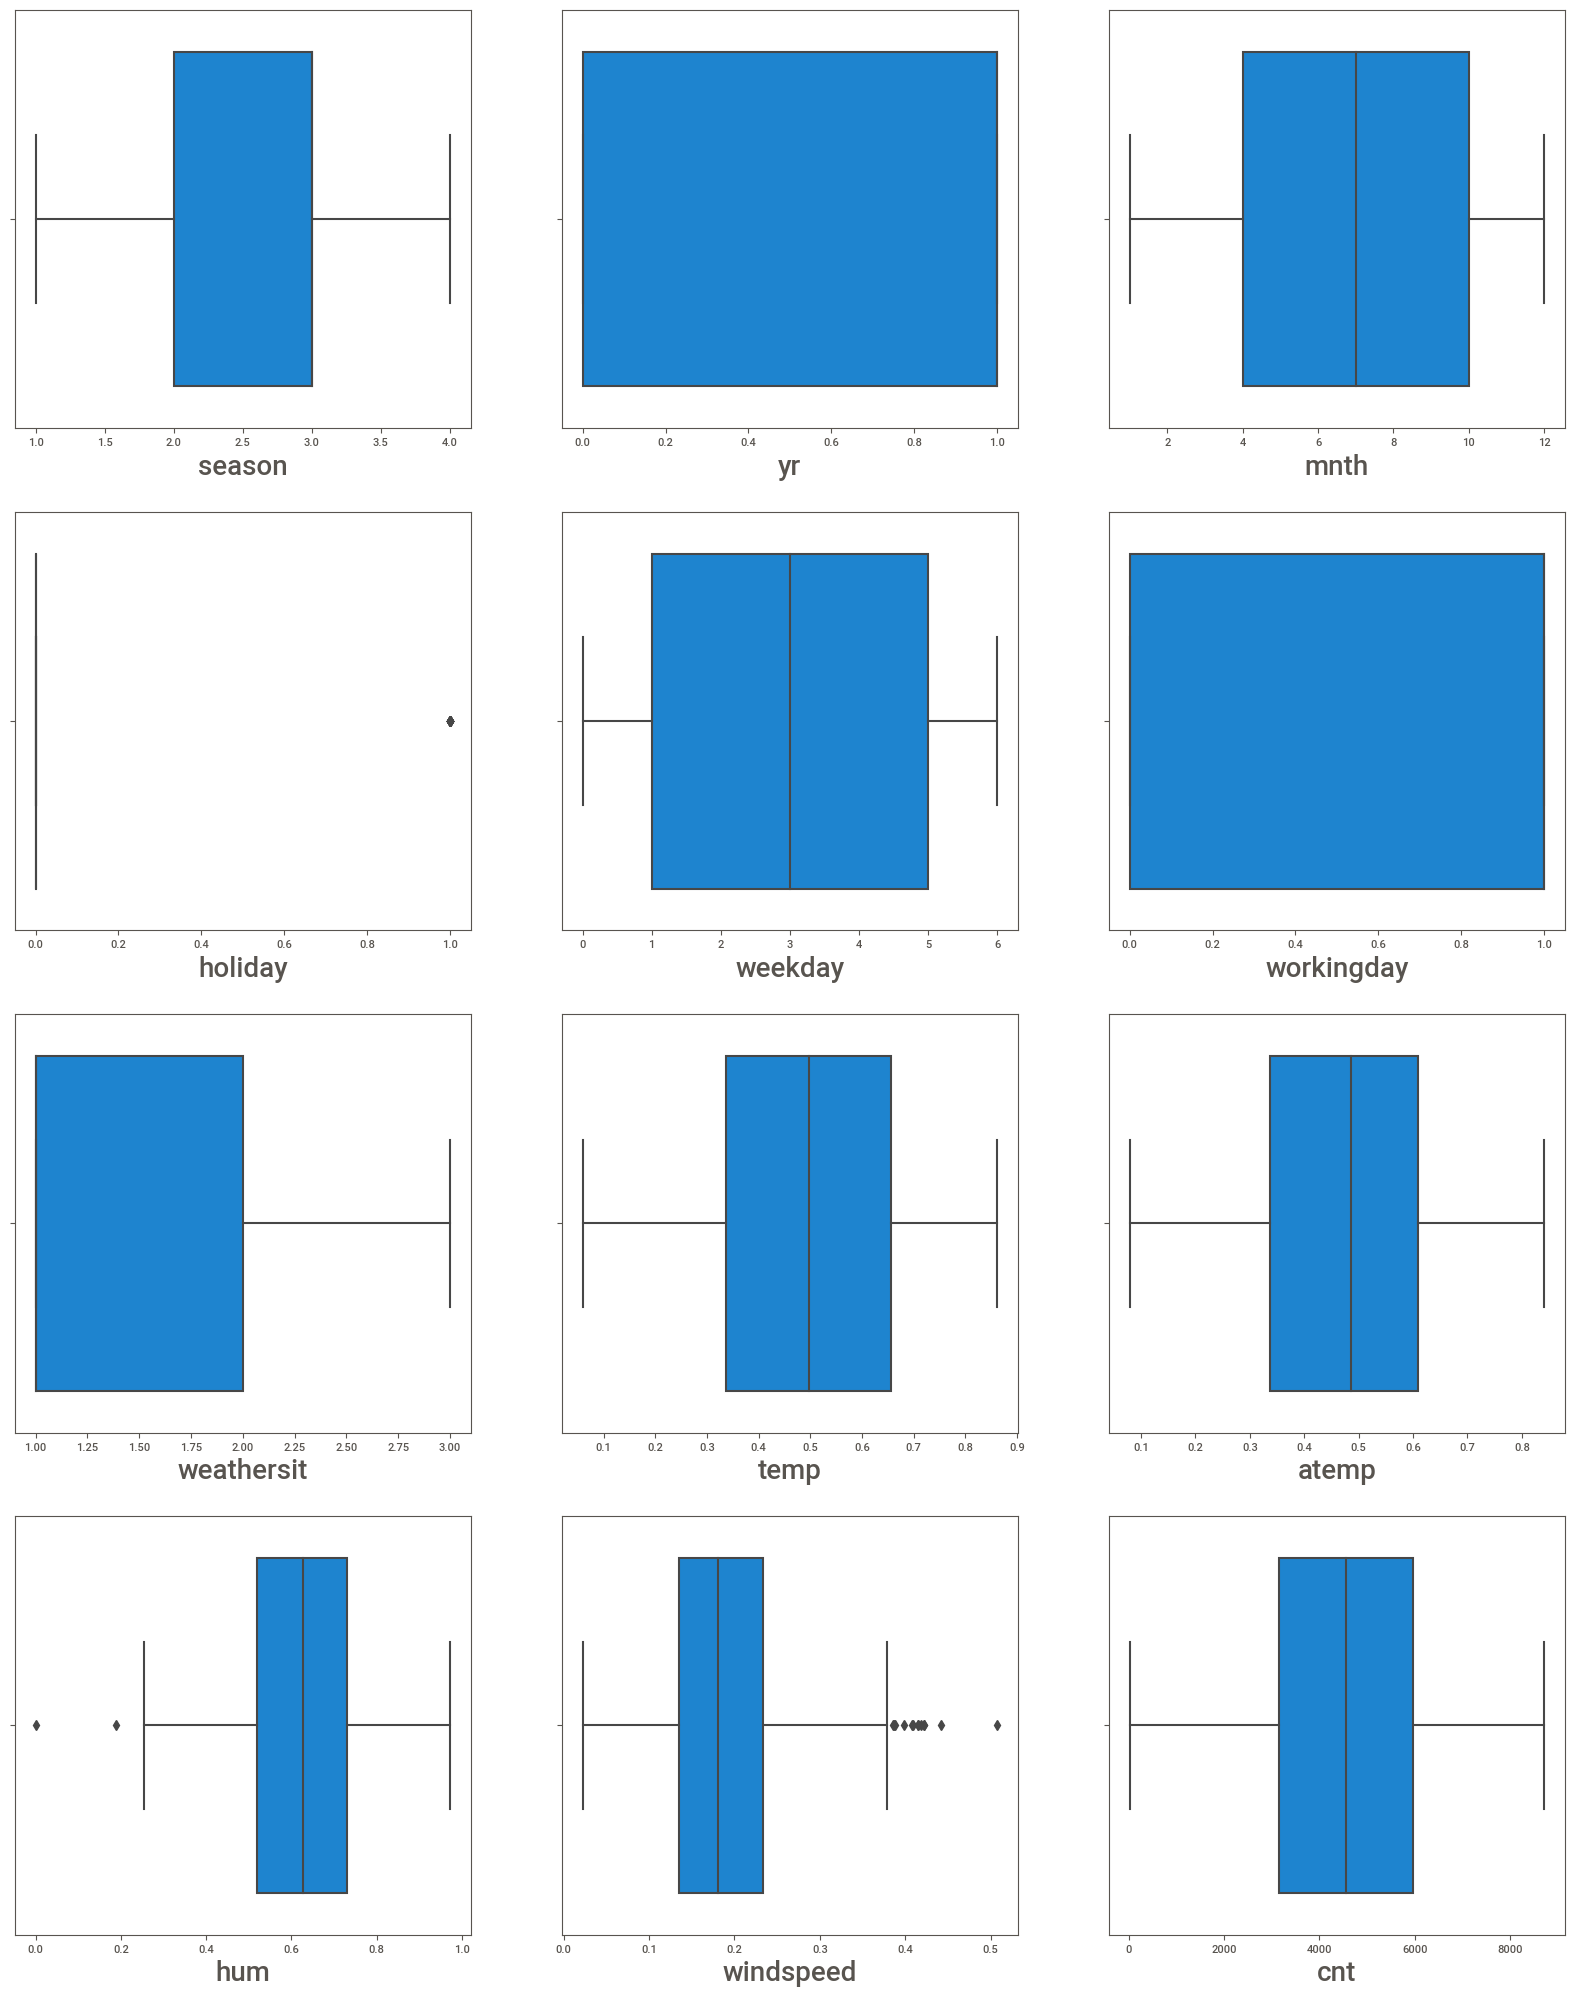

In [34]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

***observation:since there are outliers in humidity and windspeed we will remove it using median***

In [35]:
data[data['windspeed']>0.48]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
49,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,1635


In [36]:
data['windspeed'].replace(0.507463,data['windspeed'].median(),inplace=True)

In [37]:
data[data['hum']<0.25]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
49,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.180975,1635
68,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,623


In [38]:
data.loc[data['hum']<0.25,'hum']=np.median(data['hum'])

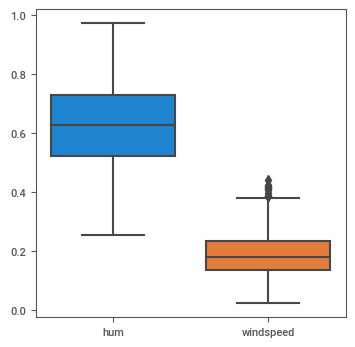

In [39]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data[['hum','windspeed']])
plt.show()

***observation:Now our data is good to go***

### Feature Selection

#since 'temp' and 'atemp' have similar distribution and may present redundancy and even multicollinearity we can drop the 'atemp' feature

In [40]:
data2=data.drop(['atemp'],axis=1)   

<AxesSubplot:>

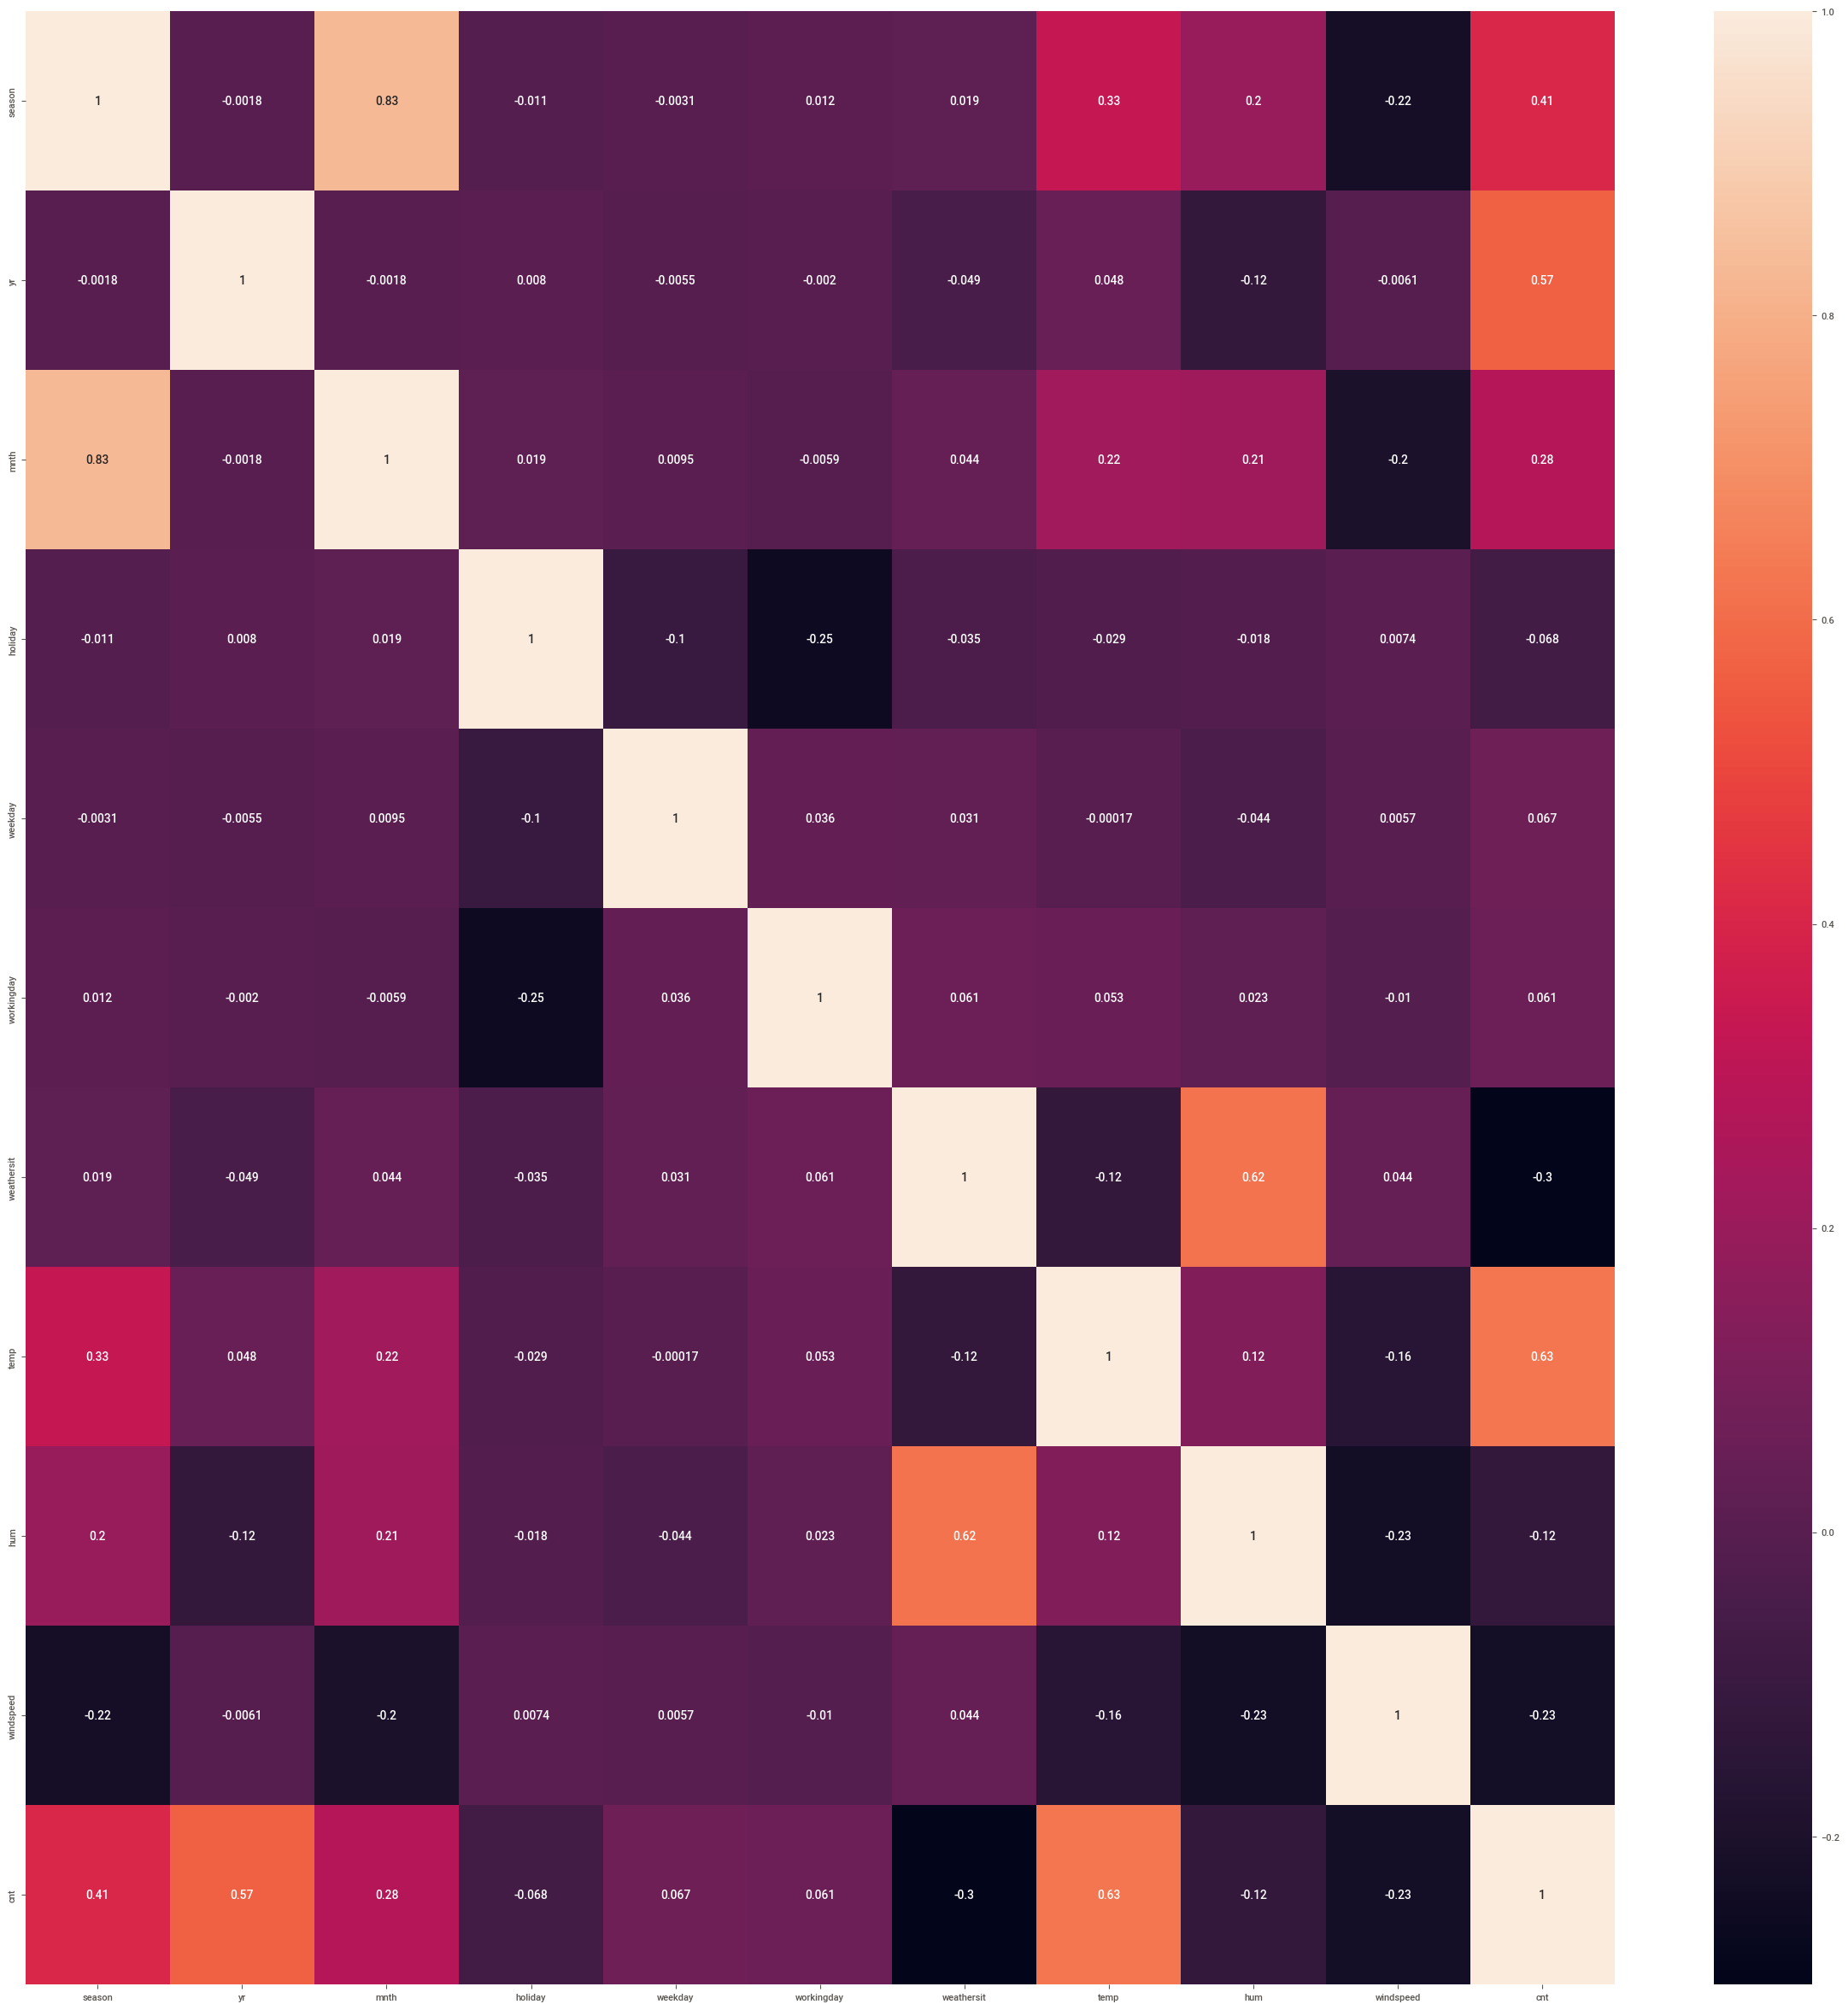

In [41]:
plt.figure(figsize=(30, 30))
sns.heatmap(data2.corr(),annot=True)

***observation:none gives correlation more than 0.90 hence not droppimg any column***

## Model Creation

In [42]:
## Creating independent and dependent variable
X = data.drop('cnt', axis=1)  #independent variable 
y = data.cnt   #dependent variable 

In [43]:
# Step 2 Traning and testing data creation
from sklearn.model_selection import train_test_split #random state is used for fixed val
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression


LinearRegression()

In [45]:
#Accuracy of the trained model
lr=LR.score(X_train,y_train)
print('Accuracy of the model:',lr)

Accuracy of the model: 0.8113945010833308


***observation:Accuracy of trained model is 0.8113***

In [46]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict

In [47]:
predict=cross_val_predict(LR,X_train,y_train,cv=3)
predict

array([6991.29808428, 7118.89994911, 7104.22386396, 3035.26235384,
       2581.73197444, 1990.20204067, 4078.67311659, 4362.82563713,
       3155.97622116, 4025.6517038 , 6693.63359165, 7919.9413894 ,
       6021.35776377, 4762.58170901, 7171.70338093, 5549.51107424,
       7489.5005404 , 1134.25445277, 5003.59774263, 6532.4794243 ,
       1336.82257541, 5138.54348775, 4938.62253381, 4980.20808208,
       3313.38128064, 3523.07451723, 3640.23291766,  -77.4369212 ,
       1866.4482726 , 1479.27062123, 6396.74243362, 5687.19686642,
       5360.13463597, 4807.7067224 , 5340.15486955, 6787.07345148,
       3906.20408281, 2798.52109119, 2845.55913683, 6535.80120062,
       5816.93148801, 6741.36277175, 2536.26761511, 3765.51493215,
       2874.52244352, 3978.97940328, 2174.65855254, 6915.43758505,
       5019.84671973, 3220.85450124, 1350.84665863, 5773.53026324,
       2361.38193297, 4501.76992401, 5312.77253776, 4639.84698581,
       6087.47847806, 5214.98624968, 2247.21980318, 2257.57483

In [48]:
r2_scores=cross_val_score(LR,X_train,y_train,cv=3)
print('R-squared scores:',np.average(r2_scores))

R-squared scores: 0.7881436703354714


***Observation: the r2 score of linear regression after using cross validation is 0.78814***

In [49]:
y_predict=LR.predict(X_test)

In [50]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [51]:
r2score

0.7526619208716534

In [52]:
from sklearn.metrics import mean_absolute_error
import math
mse=np.square(np.subtract(y_test,y_predict)).mean()
rmse=math.sqrt(mse)
mae=mean_absolute_error(y_test,y_predict)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 939.0339522877516
Mean absolute error : 685.0898711976112


***observation:r2 score of test data is 0.7526 and root mean square is 939.0339.***

***Also when comparing accuracy of trained and test data we can see that our model is generalized(81-75=6% lies between (0-11%))***

## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [54]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [55]:
#Accuracy of trained data
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model:',dtr_score)

Accuracy of model: 0.8226139020807437


***observation:accuracy of train data is 0.8226***

##### Cross validation prediction

In [56]:
predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

array([6585.59504132, 6585.59504132, 6585.59504132, 4507.88118812,
       2587.04347826, 1653.31666667, 6585.59504132, 4507.88118812,
       4507.88118812, 4507.88118812, 6585.59504132, 6585.59504132,
       6585.59504132, 6585.59504132, 6585.59504132, 5065.92307692,
       6585.59504132, 1653.31666667, 6585.59504132, 6585.59504132,
       1653.31666667, 6585.59504132, 6585.59504132, 5065.92307692,
       3528.125     , 4507.88118812, 4507.88118812, 1653.31666667,
       1653.31666667, 1653.31666667, 6585.59504132, 6585.59504132,
       5065.92307692, 4507.88118812, 6585.59504132, 6585.59504132,
       4507.88118812, 1653.31666667, 2319.        , 6585.59504132,
       6585.59504132, 6585.59504132, 4507.88118812, 4507.88118812,
       1653.31666667, 3528.125     , 3528.125     , 6585.59504132,
       4639.14285714, 4507.88118812, 1653.31666667, 6585.59504132,
       1653.31666667, 4507.88118812, 4507.88118812, 4507.88118812,
       6585.59504132, 4507.88118812, 1653.31666667, 2319.     

In [57]:
#accuracy
r2_scores=cross_val_score(dtr,X_train,y_train,cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.779954813443943


***observation:Accuracy after cross validation is 0.7799***

In [58]:
dtr_pred=dtr.predict(X_test)

In [59]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,dtr_pred)

In [60]:
r2score

0.7679338319528904

In [61]:
#Accuracy of test data
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 909.5817099538327
Mean absolute error : 685.0620560527157


***Observation:r2 score of test data is 0.7679 and the root mean square is 909.581***

***Also when comparing accuracy of trained and test data we can see that our model is generalized(82-76=6% lies between (0-11%))***

## RandomForest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor
MR=RandomForestRegressor(n_estimators=100)
MR.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
rf_score=MR.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9827157459681245


***Accuracy of trained data is 0.98***

##### Cross Validation prediction

In [64]:
predict=cross_val_predict(MR,X_train,y_train,cv=3)
predict

array([7100.42, 6657.93, 7567.83, 3565.61, 2091.68, 1838.81, 5431.98,
       5186.74, 3290.44, 4896.75, 7339.62, 5882.05, 6224.49, 6239.83,
       7458.46, 5184.22, 7049.15, 1412.1 , 5494.5 , 7521.07, 1290.12,
       6641.23, 5374.32, 5295.14, 3736.13, 4600.82, 4633.6 ,  987.92,
       1374.24, 1825.5 , 6965.4 , 6473.87, 5059.79, 4923.  , 5712.55,
       6800.34, 4767.02, 2273.02, 2650.27, 7597.13, 6250.6 , 6914.22,
       3781.68, 4993.58, 2631.69, 3906.05, 3300.81, 7438.91, 3946.03,
       4321.62, 2169.94, 6706.04, 2292.72, 4719.78, 4516.9 , 4621.79,
       6955.  , 5000.63, 1958.67, 2715.33, 5753.61, 2737.22, 6406.06,
       4539.69, 6764.77, 6420.84, 4305.07, 4327.07, 4830.28, 7385.99,
       4348.79, 2569.31, 7189.58, 1369.84, 7110.17, 4308.94, 4370.6 ,
       6657.27, 4792.  , 6174.5 , 7002.93, 2867.9 , 4067.19, 2226.58,
       2944.96, 4660.26, 5162.51, 1385.15, 4863.38, 3401.8 , 4609.95,
       3700.8 , 7390.64, 3985.93, 1272.64, 3561.31, 4279.36, 1319.99,
       3989.09, 4722

In [65]:
#Accuracy
r2_scores = cross_val_score(MR, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8741187260686799


***Observation:Accuracy after cross validation is 0.8762***

In [66]:
rf_pred=MR.predict(X_test)

In [67]:
#Accuracy of test data
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,rf_pred)
r2score

0.8590564550195489

In [68]:
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 708.8566184389914
Mean absolute error : 497.3518367346939


***Observation:r2 score of test data is 0.8568 and root mean square error is 714.471***

***Thus the error is low in random forest compared to all other fitted models***

### Final Model for bike rental count

***Observation: When we compare the root mean squared error and mean absolute error of all 3 models, the random forest model has less root mean squared error and mean absolute error.Also the accuracy according to r2score is also high for RandomForest. So, finally random forest model is bset for predicting the bike rental count on daily basis.***

In [69]:
rf_pred=MR.predict(X_test)
for i, pred in enumerate(rf_pred):
    print(f"Prediction for X_test[{i}]:{pred}")

Prediction for X_test[0]:3262.66
Prediction for X_test[1]:1504.35
Prediction for X_test[2]:1542.45
Prediction for X_test[3]:4509.46
Prediction for X_test[4]:3868.02
Prediction for X_test[5]:3770.22
Prediction for X_test[6]:4335.41
Prediction for X_test[7]:4520.67
Prediction for X_test[8]:3420.07
Prediction for X_test[9]:4063.9
Prediction for X_test[10]:7031.98
Prediction for X_test[11]:4049.26
Prediction for X_test[12]:7626.92
Prediction for X_test[13]:5892.56
Prediction for X_test[14]:2211.92
Prediction for X_test[15]:6735.49
Prediction for X_test[16]:2434.99
Prediction for X_test[17]:4254.88
Prediction for X_test[18]:3272.19
Prediction for X_test[19]:7183.48
Prediction for X_test[20]:3566.09
Prediction for X_test[21]:2101.23
Prediction for X_test[22]:4562.7
Prediction for X_test[23]:1791.95
Prediction for X_test[24]:3285.68
Prediction for X_test[25]:6645.13
Prediction for X_test[26]:2976.41
Prediction for X_test[27]:3380.3
Prediction for X_test[28]:5678.75
Prediction for X_test[29]:6

## Conclusion

***Predicting bike rental based on environment and seasons deals with the real-life problems that is were the bikes are going to be unused and kept as waste in the docking stations. In this, we predicted the total number of users that are going to be registered by taking the data of one docking station. We have used the regression techniques to solve the issue of unusage of the bike that are present in the docking stations. By using this regression technique, we got the accurate prediction of the users that are going to be registered in the future. In this model, we eliminated the duplicate data and the unwanted data, we cleaned the data, and we used this cleaned data as data points by collecting all these data points, and got a prediction line***

***We fitted Linear regression, Decision Tree and  Random forest model and find the accuracy with and without cross validation and find out that accuracy of RandomForest is high and thus used this model for the prediction of bike rental counts***